In [333]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(20, 20))
mpl.rc('image', cmap='gray')

import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp

tp.quiet()  # Turn off progress reports for best performance
plt.figure(figsize=(30, 30))  # Adjust the width and height as needed

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

In [334]:
@pims.pipeline
def gray(image):
    return image[int(1152/2-320):int(1152/2+320), int(1152/2-320):int(1152/2+320)]  # Take just the green channel

frames = gray(pims.open('frames/*.png'))

/home/stefan/miniconda3/envs/enzo/lib/python3.11/site-packages/imageio/plugins/pillow.py:297: UserWarning: Loading 16-bit (uint16) PNG as int32 due to limitations in pillow's PNG decoder. This will be fixed in a future version of pillow which will make this warning dissapear.
  warnings.warn(


Detecting particles in one frame:

/home/stefan/miniconda3/envs/enzo/lib/python3.11/site-packages/imageio/plugins/pillow.py:297: UserWarning: Loading 16-bit (uint16) PNG as int32 due to limitations in pillow's PNG decoder. This will be fixed in a future version of pillow which will make this warning dissapear.
  warnings.warn(


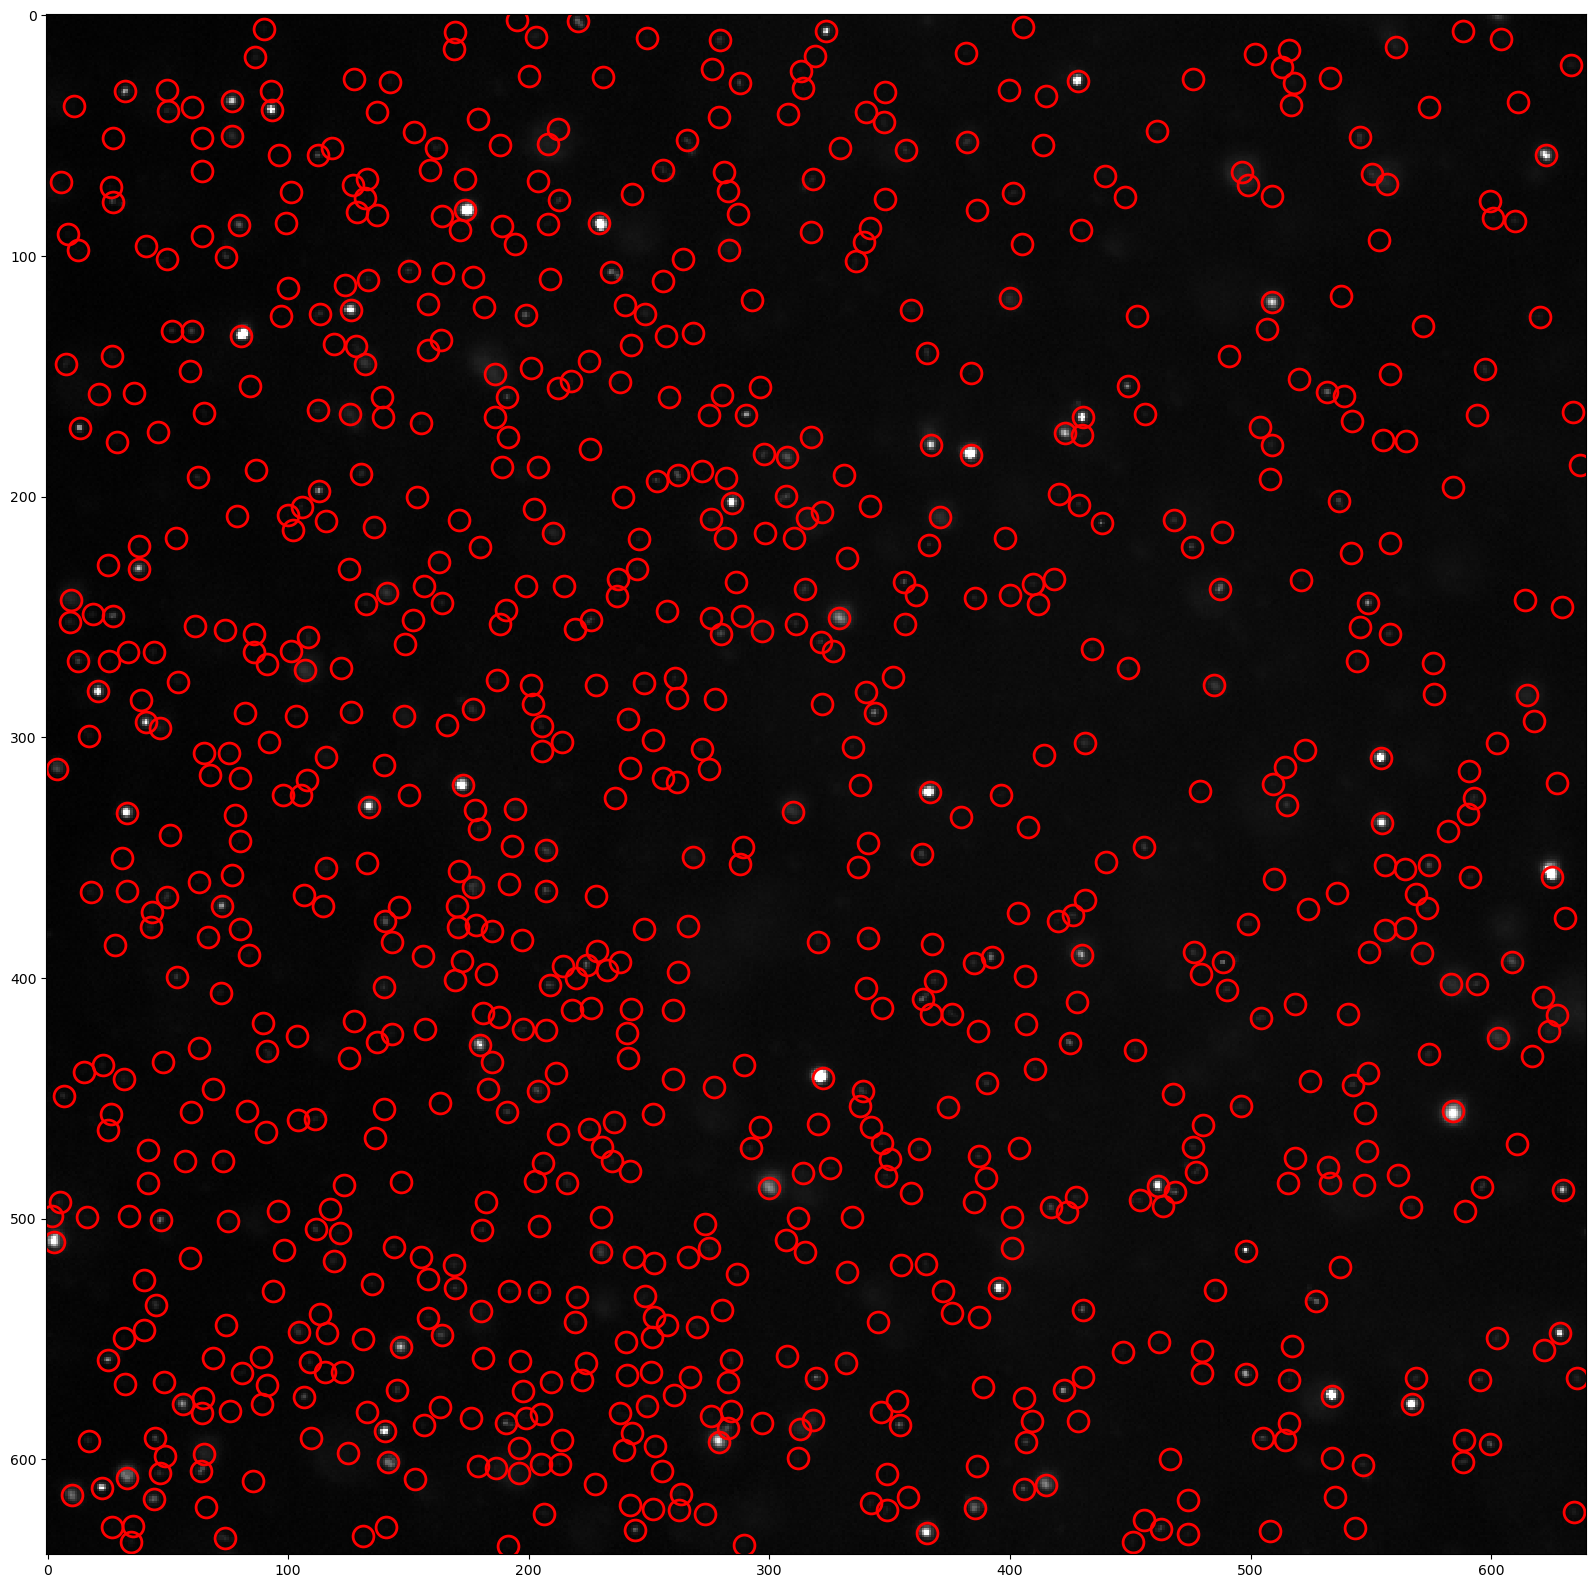

In [337]:
import random
i = random.randint(0,100)
frame = frames[i][0:,0:]
f = tp.locate(frame, diameter = 5, invert=False, minmass=0, noise_size=0, smoothing_size=5, characterize=False, percentile=98)
tp.annotate(f, frame);

Detecting particles in all frames:

In [338]:
f = tp.batch(frames[:], diameter = 5, invert=False, minmass=0, noise_size=0, smoothing_size=5, characterize=False, percentile=98)
f.head(3)

/home/stefan/miniconda3/envs/enzo/lib/python3.11/site-packages/imageio/plugins/pillow.py:297: UserWarning: Loading 16-bit (uint16) PNG as int32 due to limitations in pillow's PNG decoder. This will be fixed in a future version of pillow which will make this warning dissapear.
  warnings.warn(
/home/stefan/miniconda3/envs/enzo/lib/python3.11/site-packages/imageio/plugins/pillow.py:297: UserWarning: Loading 16-bit (uint16) PNG as int32 due to limitations in pillow's PNG decoder. This will be fixed in a future version of pillow which will make this warning dissapear.
  warnings.warn(
/home/stefan/miniconda3/envs/enzo/lib/python3.11/site-packages/imageio/plugins/pillow.py:297: UserWarning: Loading 16-bit (uint16) PNG as int32 due to limitations in pillow's PNG decoder. This will be fixed in a future version of pillow which will make this warning dissapear.
  warnings.warn(
/home/stefan/miniconda3/envs/enzo/lib/python3.11/site-packages/imageio/plugins/pillow.py:297: UserWarning: Loading 16-

,y,x,mass,frame
0,1.815364,295.395978,3032.999932,0
1,1.832669,447.273387,5515.999890,0
2,3.018162,39.158476,2807.999898,0


Linking particles in between frames (trajectories):

In [372]:
t = tp.link(f, search_range=10, memory=2)
t.head(3)

,y,x,mass,frame,particle
0,1.815364,295.395978,3032.999932,0,0
646,449.188215,326.615488,2969.999937,0,1
647,449.733133,621.231884,2000.999949,0,2


Ephemeral trajectories — seen only for a few frames — are usually spurious and never useful. The convenience function filter_stubs keeps only trajectories that last for a given number of frames.

In [373]:
t1 = tp.filter_stubs(t, 50)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())
t1.head(3)

Before: 31175
After: 752


,y,x,mass,frame,particle
frame,,,,,
0,450.179823,115.990552,3280.999917,0,6
0,457.402609,579.464563,133066.999899,0,14
0,431.166415,597.776993,17846.999873,0,39


Trajectory information of particle #2:

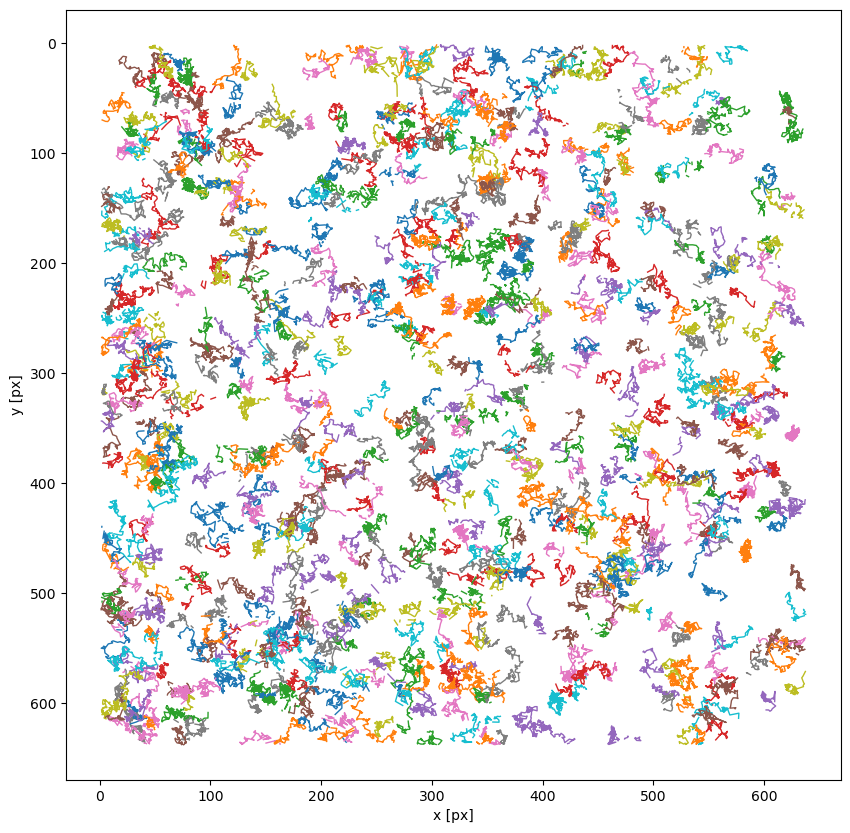

In [374]:
#plt.figure()
plt.figure(figsize=(10, 10))
tp.plot_traj(t1);

Compute the mean squared displacement (MSD) of each particle

In [375]:
im = tp.imsd(t1, 1., 50)  # microns per pixel = 100/285., frames per second = 50
im#[2]

,6,14,39,42,46,52,55,63,79,90,...,28143,28152,28225,28244,28306,28353,28388,28397,28468,28538
lag time [s],,,,,,,,,,,,,,,,,,,,,
0.02,7.388131,3.467529,5.153566,6.301759,4.048525,7.976071,2.534756,1.320010,2.487690,6.694543,...,3.460392,6.516913,2.618620,5.900216,4.217393,5.896062,4.946803,5.687714,4.966878,6.910716
0.04,15.703585,4.601983,8.793671,14.202181,10.211216,14.066816,4.190073,2.649496,5.432721,13.468150,...,8.543507,12.586775,7.170992,12.675223,8.787295,12.156275,10.956271,11.287107,10.802463,16.982818
0.06,25.706930,5.378456,12.501807,23.515418,13.051673,19.517070,5.608681,4.001940,8.224454,18.941967,...,12.533012,15.097490,10.004573,19.533896,12.831594,19.000755,16.039773,17.705527,18.323977,27.037465
0.08,37.162015,6.422531,16.207728,33.507964,15.268841,26.270198,7.362745,5.467835,10.948680,24.934940,...,17.387567,18.567820,13.412888,27.035520,17.686403,24.672124,20.711989,26.621351,27.401316,33.708943
0.10,51.715407,7.634654,19.786229,42.841569,15.299855,32.296359,9.208314,7.068069,13.575761,28.613410,...,20.925498,23.139430,16.568997,33.269926,22.351505,32.249850,25.584520,33.304069,38.012042,41.229670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.92,NaN,56.993397,NaN,NaN,NaN,NaN,129.195976,99.145480,275.238849,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.94,NaN,57.236182,NaN,NaN,NaN,NaN,131.384998,98.755782,279.323190,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.96,NaN,57.604598,NaN,NaN,NaN,NaN,132.960688,98.820796,283.425759,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [376]:
t1 = t1.rename_axis('index')
raw_masses = t1.groupby('particle').agg({'mass': 'mean'})
raw_masses

,mass
particle,
6,9225.196864
14,146079.589064
39,15091.157167
42,11865.308977
46,89072.048288
...,...
28353,24751.038368
28388,32636.188591
28397,33880.274408


In [377]:
msd = []
mass = []
lag_time = 1.00
for i in im.columns:
    msd_i = im.loc[lag_time][i]
    raw_mass_i = raw_masses.loc[i][0]
    if not np.isnan(msd_i) and not np.isnan(raw_mass_i) and i in raw_masses.index and msd_i>0:
        #print(i, msd_i)
        #print(raw_mass_i)
        msd.append(msd_i)
        mass.append(raw_mass_i)
        

Text(0, 0.5, 'MSD')

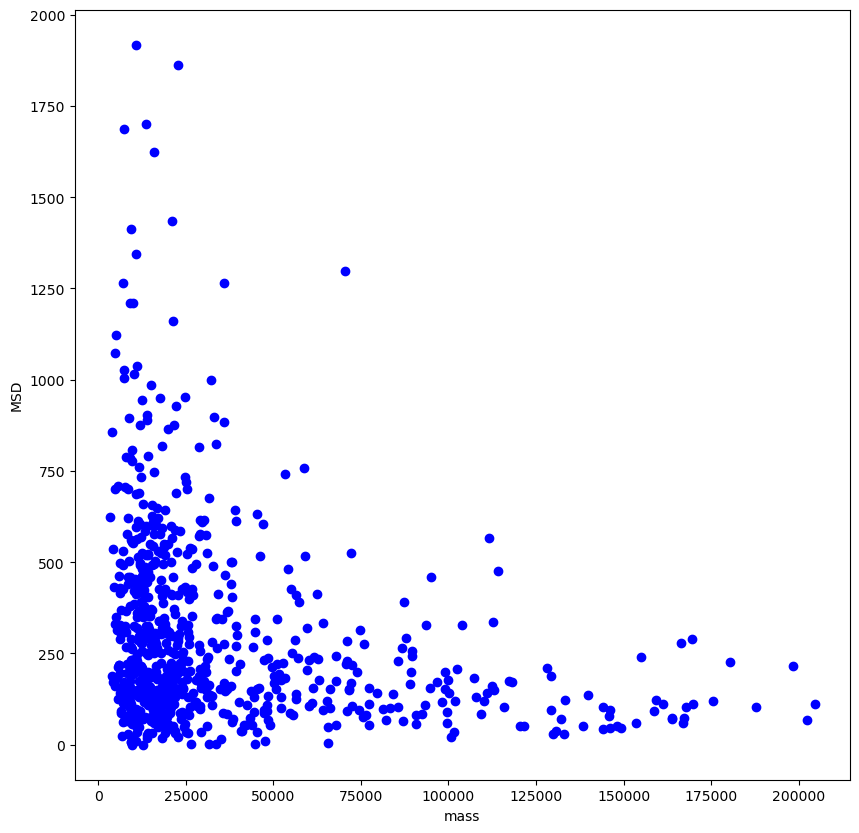

In [378]:
mpl.rc('figure',  figsize=(10, 10))
plt.scatter(mass, msd, label='Scatter Plot', color='blue', marker='o')
plt.xlabel('mass')
plt.ylabel('MSD')

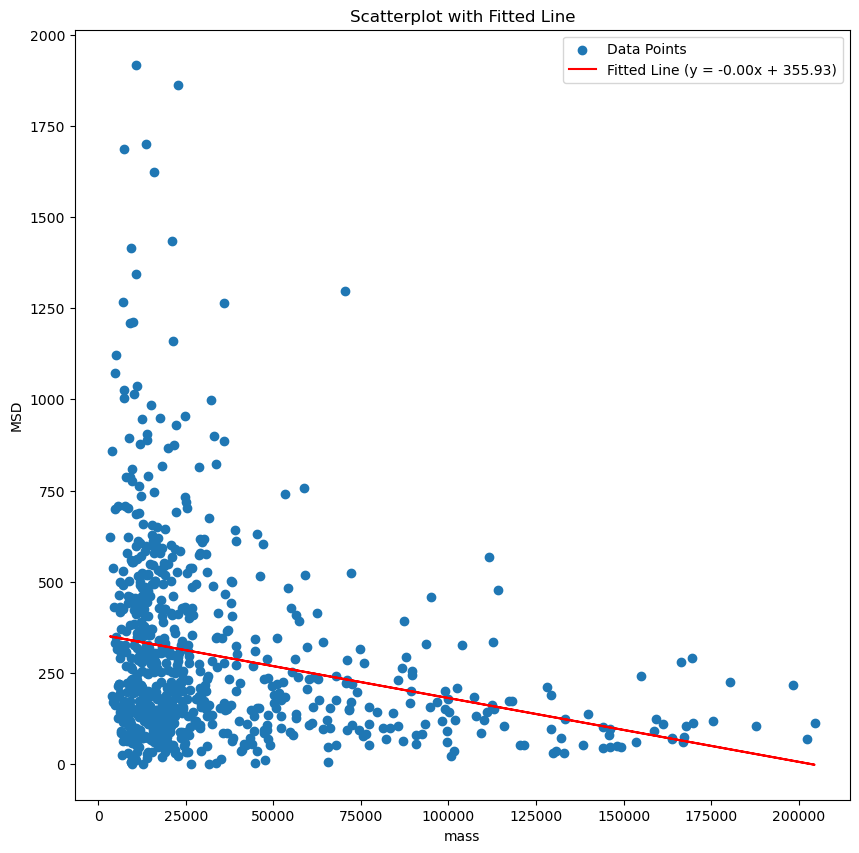

In [380]:
coefficients = np.polyfit(mass, msd, 1)
slope = coefficients[0]
intercept = coefficients[1]

# Create a scatterplot of the data points
plt.scatter(mass, msd, label='Data Points')

# Plot the fitted line
fitted_line = np.polyval(coefficients, mass)
plt.plot(mass, fitted_line, color='red', label=f'Fitted Line (y = {slope:.2f}x + {intercept:.2f})')

# Customize the plot (add labels, title, legend, etc. as needed)
plt.xlabel('mass')
plt.ylabel('MSD')
plt.title('Scatterplot with Fitted Line')
plt.legend()

# Display the plot
plt.show()

/home/stefan/miniconda3/envs/enzo/lib/python3.11/site-packages/imageio/plugins/pillow.py:297: UserWarning: Loading 16-bit (uint16) PNG as int32 due to limitations in pillow's PNG decoder. This will be fixed in a future version of pillow which will make this warning dissapear.
  warnings.warn(


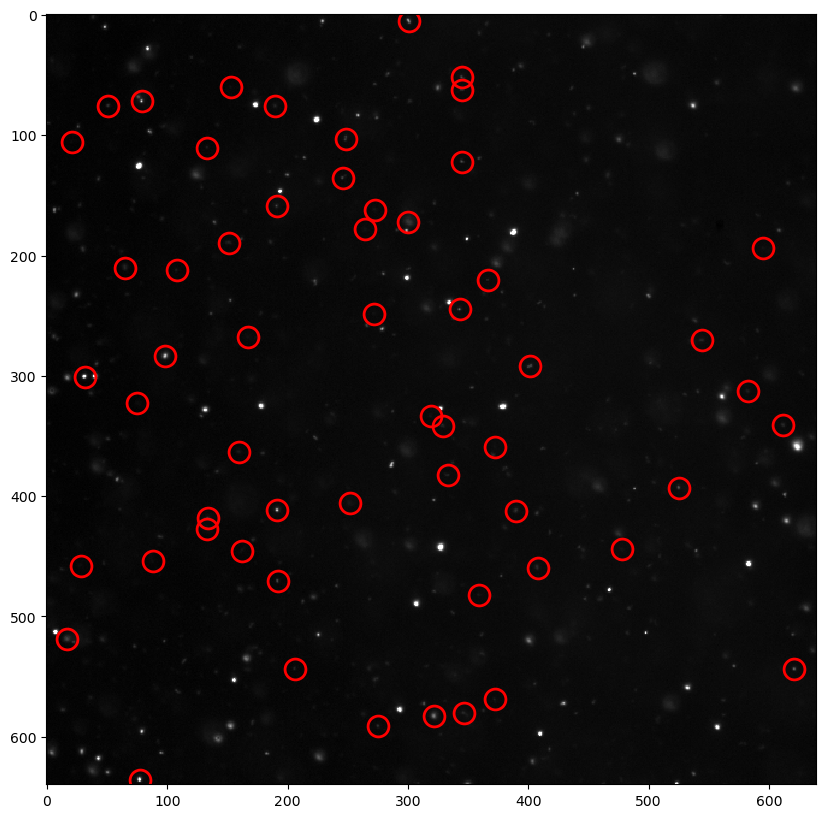

In [423]:
msd_f = [list(im.columns)[idx] for idx,i in enumerate(msd) if i<np.median(msd)]
mass_f = [list(im.columns)[idx] for idx,i in enumerate(mass) if i<np.median(mass)]
to_plot = list(set(msd_f) & set(mass_f))

frame = frames[150]
tx = t1.loc[(t1["frame"]==150) & (t1["particle"].apply(lambda x: x in to_plot)),:]
tp.annotate(tx, frame);

In [75]:
result = [a / b for a, b in zip(mass, msd)]
result = np.log(result)

In [76]:
max(result)

14.36720164372552

(array([342., 211., 103.,  48.,  21.,   8.,   6.,   3.,   3.,   2.]),
 array([1.04732433e-01, 1.91860047e+02, 3.83615362e+02, 5.75370676e+02,
        7.67125991e+02, 9.58881305e+02, 1.15063662e+03, 1.34239193e+03,
        1.53414725e+03, 1.72590256e+03, 1.91765788e+03]),
 <BarContainer object of 10 artists>)

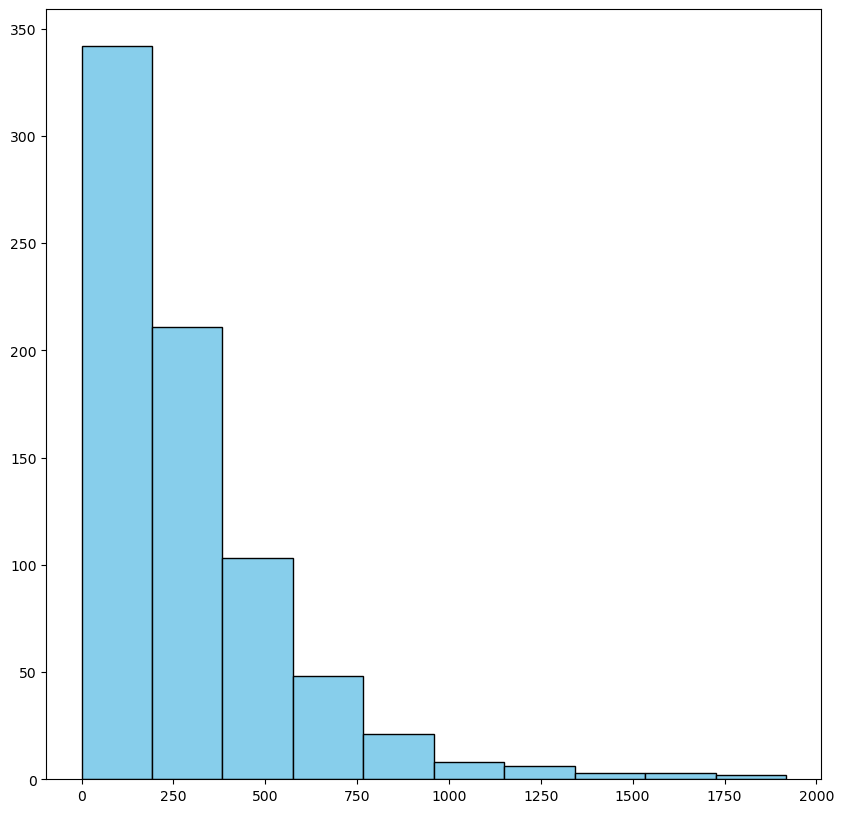

In [382]:
plt.hist(msd, bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed

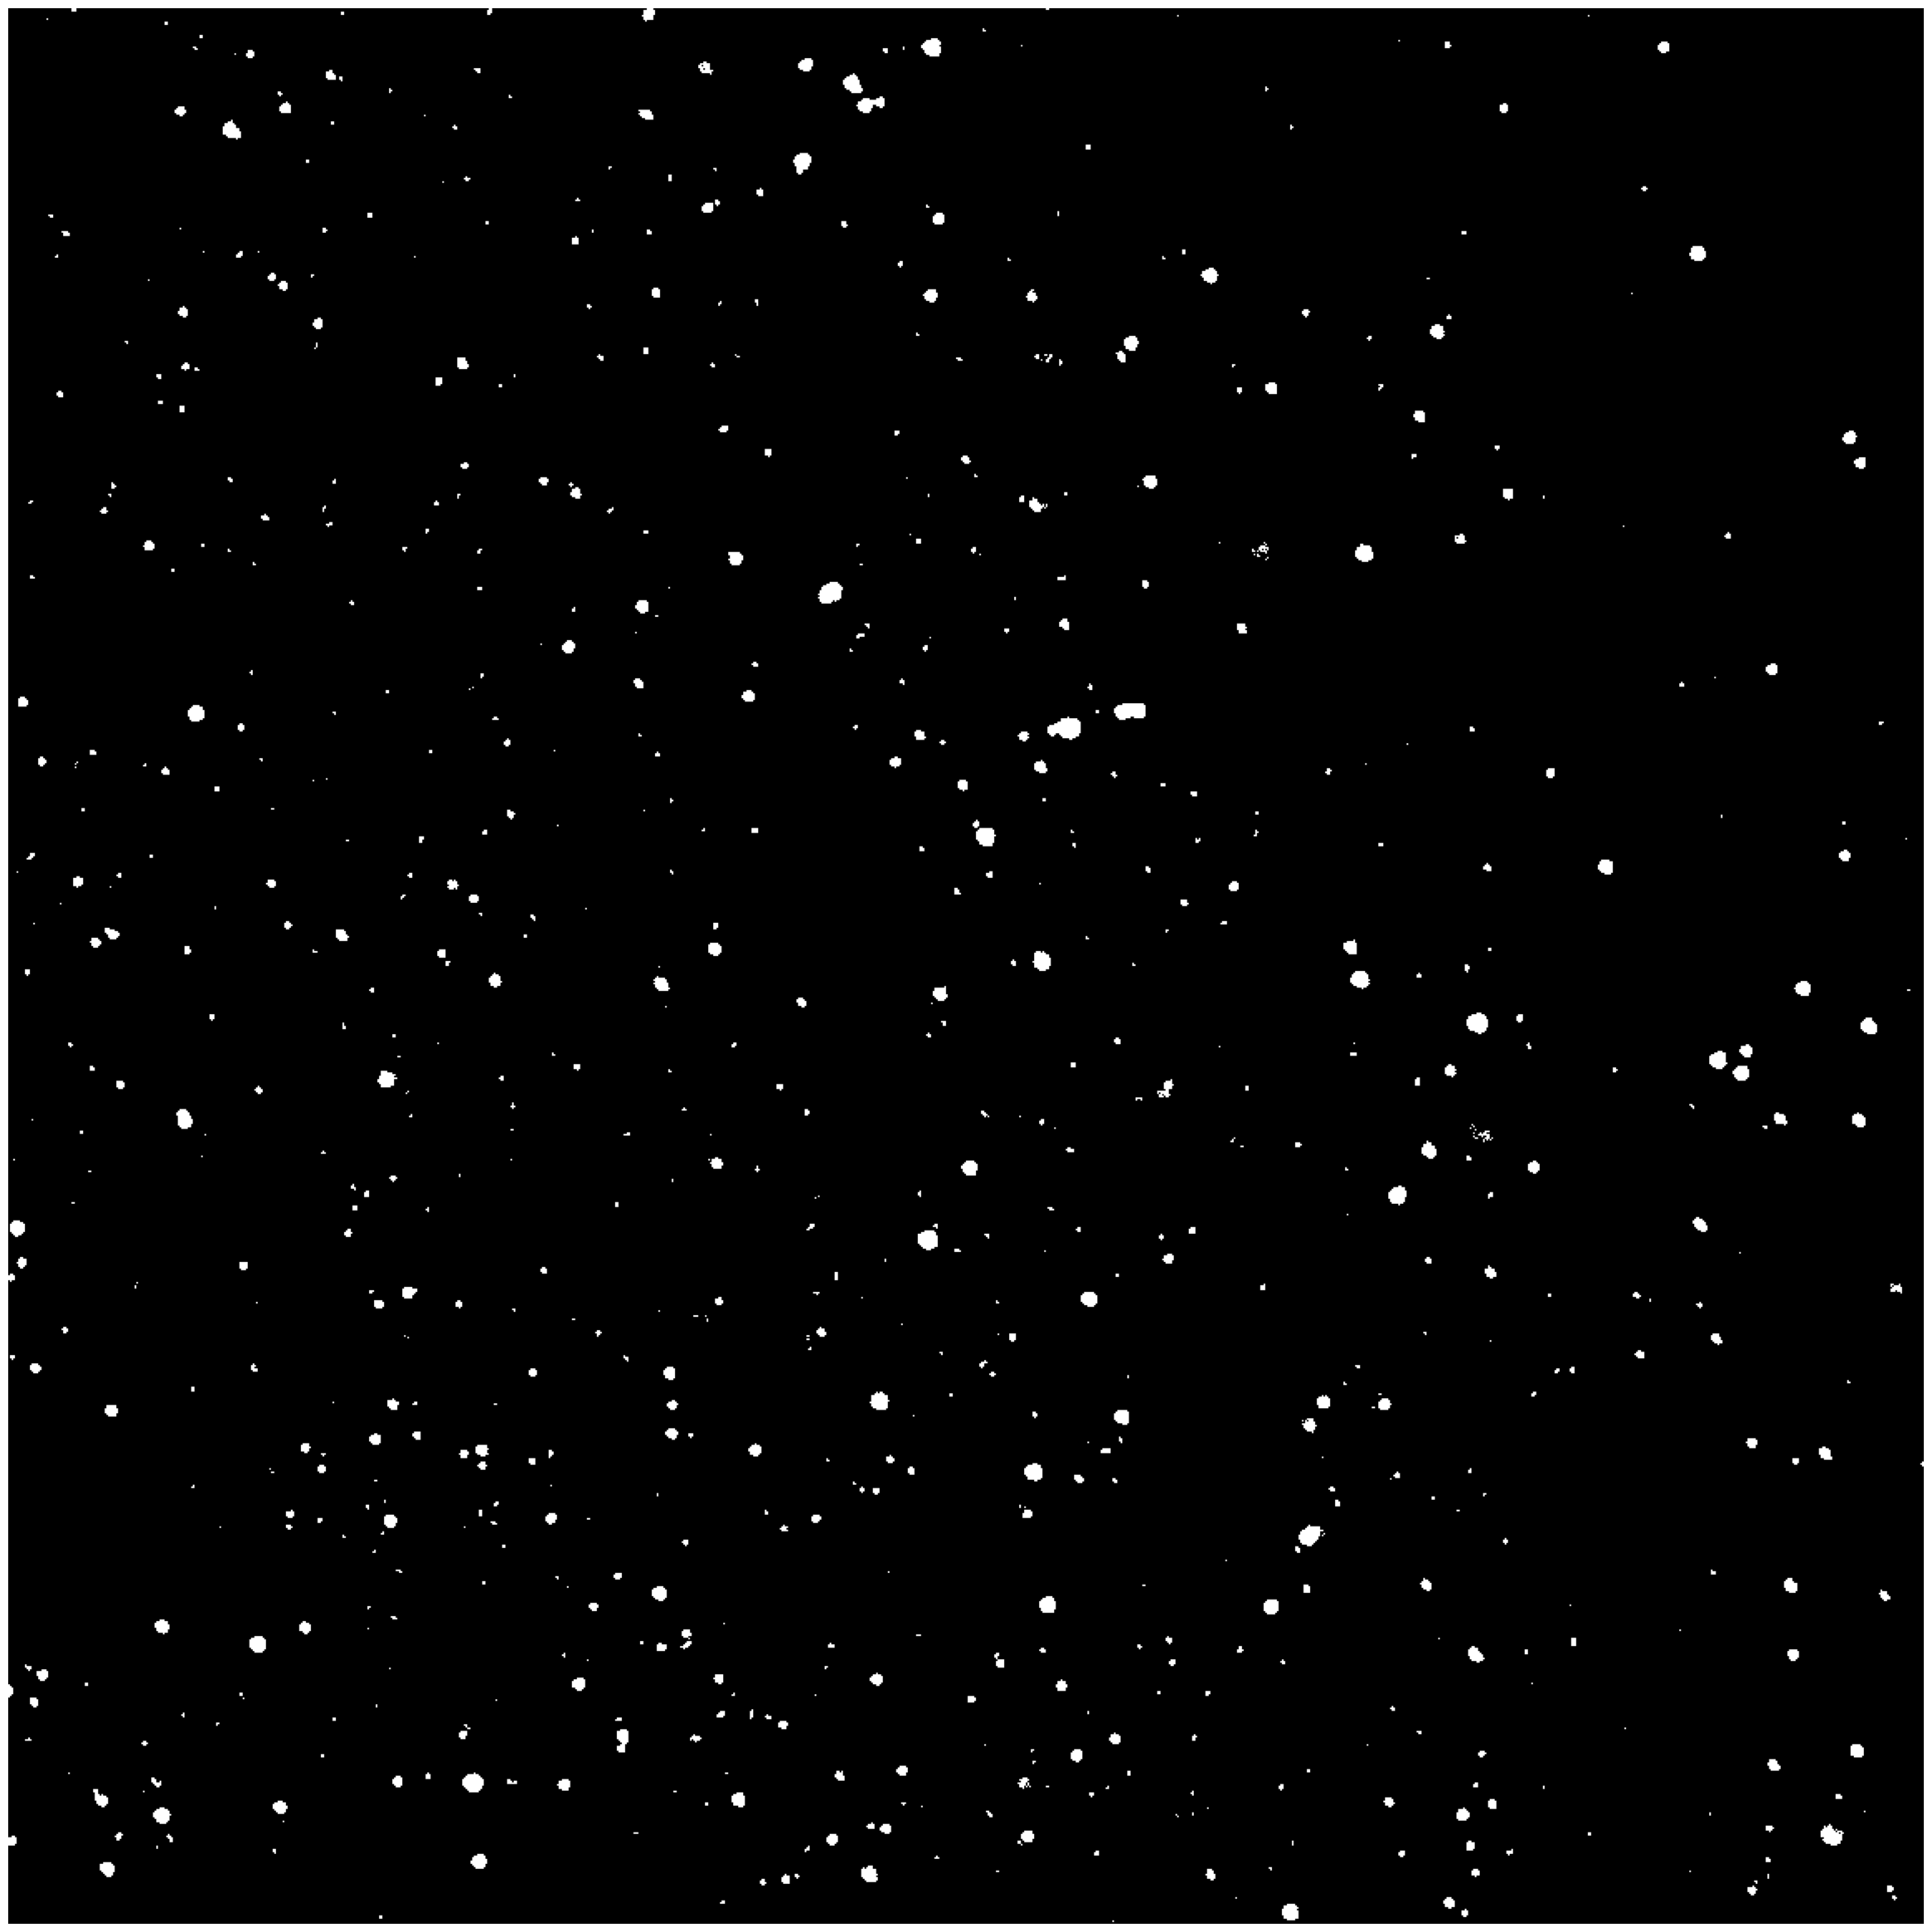

In [92]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img1 = Image.open('frames/Substack (1-314)00000010.png')
img2 = Image.open('frames/Substack (1-314)00000002.png')

img1 = np.array(img1)
img2 = np.array(img2)

pixel_values = img1.flatten()

# Sort the pixel values in ascending order
sorted_values = np.sort(pixel_values)

# Calculate the index corresponding to the 95th percentile
percentile_index = int(0.99 * len(sorted_values))

# Retrieve the value at the 95th percentile
value_at_95th_percentile = sorted_values[percentile_index]

# Define the threshold value (adjust as needed)
threshold = value_at_95th_percentile  # For example, a threshold of 128

# Create a mask where pixels above the threshold are True
above_threshold_mask = img_array > threshold

# Set the pixels above the threshold to pink (255, 0, 255 in RGB)
img_array[above_threshold_mask] = 65535
img_array[~above_threshold_mask] = 0

# Scale the 16-bit image to an 8-bit range (0-255)
scaled_image_data = (img_array / 65535 * 255).astype(np.uint8)

# Convert the modified NumPy array back to an image
#img_array = Image.fromarray(img_array)

# Plot the grayscale image
plt.figure(figsize=(30, 30))  # Adjust the width and height as needed
plt.imshow(scaled_image_data, cmap='gray')
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

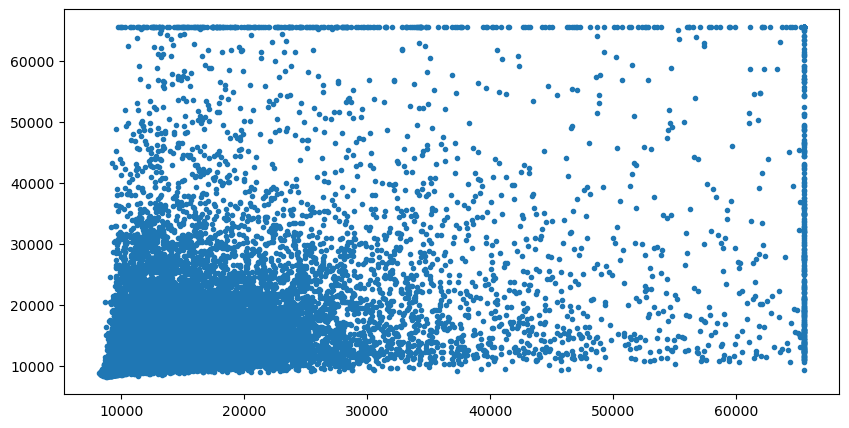

In [90]:
img1 = Image.open('frames/Substack (1-314)00000001.png')
img2 = Image.open('frames/Substack (1-314)00000005.png')

img1 = np.array(img1)
img2 = np.array(img2)

img1 = img1.flatten()
img2 = img2.flatten()

plt.scatter(img1, img2, marker='.')
plt.show()

In [102]:
value_at_95th_percentile

14721

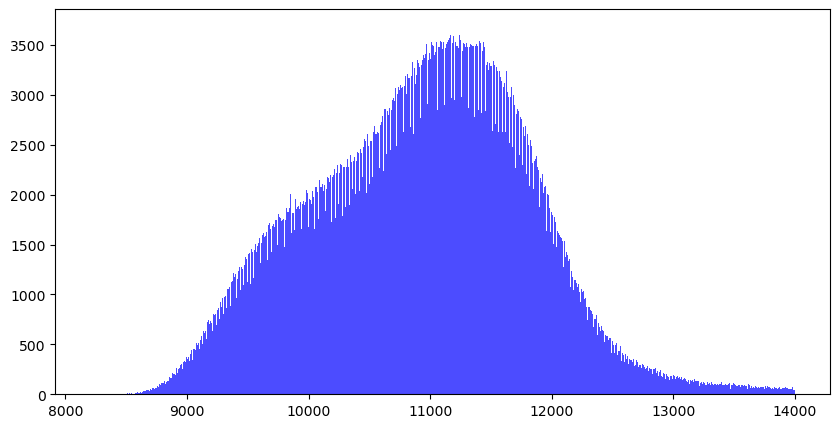

In [84]:
plt.hist(pixel_values[pixel_values<14000], bins=1000, color='blue', alpha=0.7)  # Adjust the number of bins as needed
plt.show()

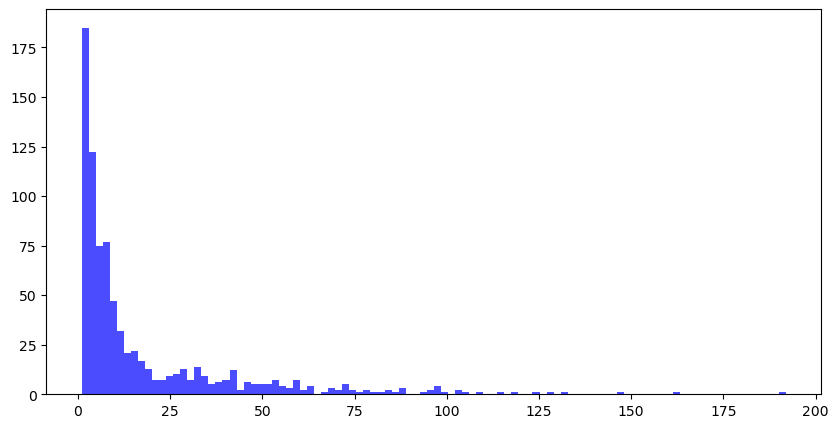

In [106]:
plt.hist(sizes, bins=100, color='blue', alpha=0.7)  # Adjust the number of bins as needed
plt.show()

In [94]:
from skimage.measure import label, regionprops

In [110]:
img1 = Image.open('frames/Substack (1-314)00000001.png')
img1 = np.array(img1)

threshold = 14721#65535  # Adjust this to your desired threshold value

# Create a binary mask where pixels above the threshold are True
binary_mask = img1 > threshold

# Label connected components in the binary mask
label_image = label(binary_mask)

# Measure properties of the labeled regions
regions = regionprops(label_image)

# Print the size of each region (number of pixels)
sizes = []
for region in regions:
    #print(f"Region {region.label}: Size = {region.area} pixels")
    sizes.append(region.area)

In [97]:
percentile_index

1313832

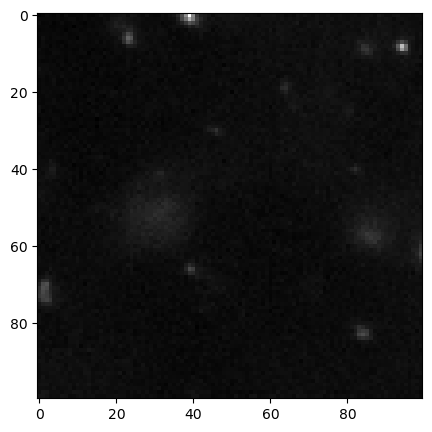

In [108]:
img1 = Image.open('frames/Substack (1-314)00000001.png')
img1 = np.array(img1)
img1 = img1[:100,:100]
plt.imshow(img1, cmap='gray')
plt.show()

In [138]:
def get_pixel_percentile(img, perc =.99):
    pixel_values = img.flatten()
    sorted_values = np.sort(pixel_values)
    percentile_index = int(perc * len(sorted_values))
    return sorted_values[percentile_index]
    


def make_bin(img, perc =.99):

    val = get_pixel_percentile(img, perc)
    above_threshold_mask = img > val

    # Set the pixels above the threshold to pink (255, 0, 255 in RGB)
    img[above_threshold_mask] = 65535
    img[~above_threshold_mask] = 0
    return img

In [141]:
def get_sizes(img, perc=.99):

    val = get_pixel_percentile(img, perc)
    binary_mask = img > val
    label_image = label(binary_mask)
    regions = regionprops(label_image)
    return [region.area for region in regions]

In [190]:
crop = [random.randint(0,1152), random.randint(0,1152)]
print(crop)

[645, 1035]


001
002
003
004
005
006
007


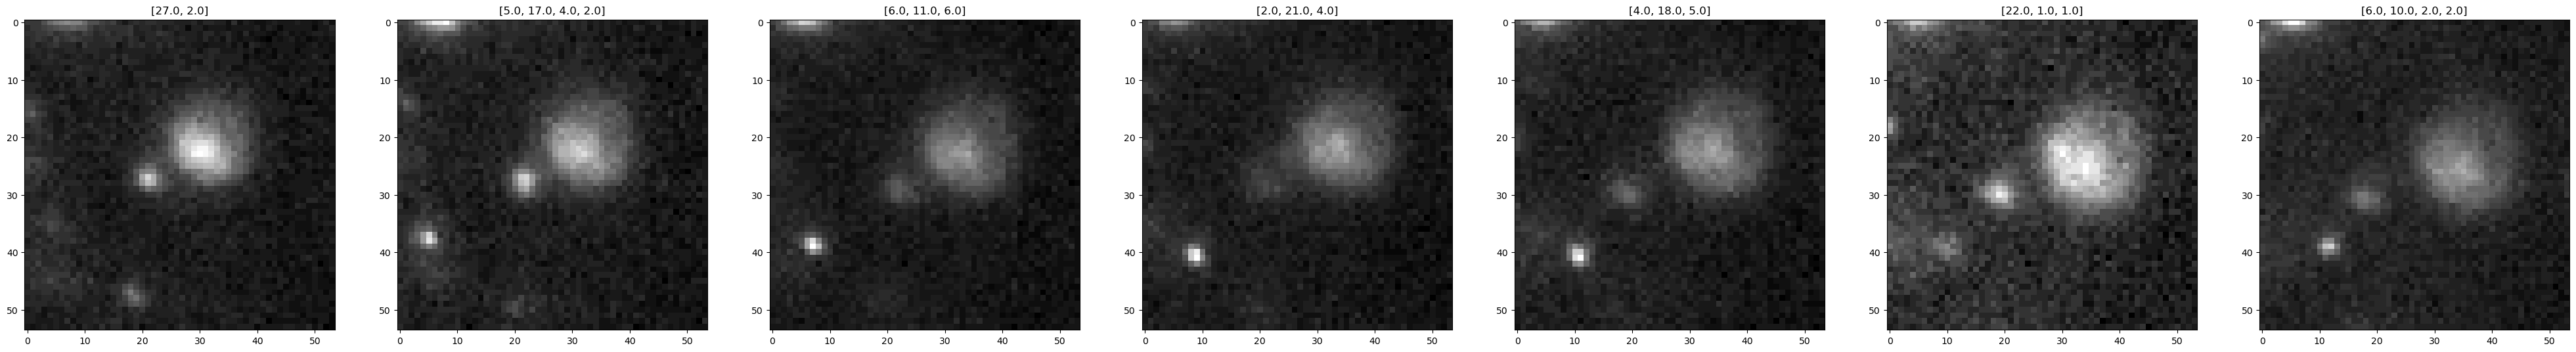

In [191]:
plt.figure(figsize=(50, 50))  # Adjust the figure size as needed
n=7

for i in range(1,n+1):

    img_nr = ("000"+str(i))[-3:]
    print(img_nr)
    img = Image.open(f'frames/Substack (1-314)0000000{i}.png'.format(img_nr))
    img = np.array(img)
    img = img[crop[0]:crop[0]+54,crop[1]:crop[1]+54]
    #img = make_bin(img)
    img = (img / 65535 * 255).astype(np.uint8)
    plt.subplot(2, n, i)
    plt.title(get_sizes(img, perc=.99))
    plt.imshow(img)
    


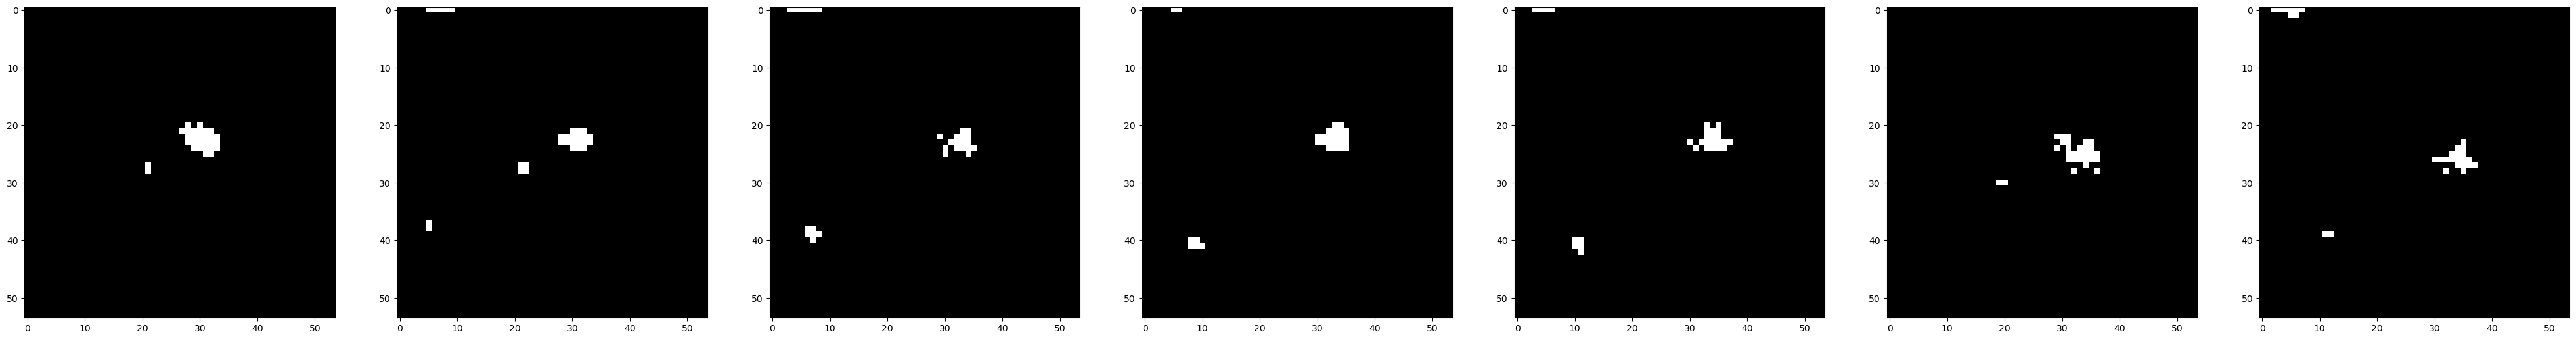

In [192]:
plt.figure(figsize=(50, 50))  # Adjust the figure size as needed
for i in range(1,n+1):
    img_nr = ("000"+str(i))[-3:]
    img = Image.open(f'frames/Substack (1-314)0000000{i}.png'.format(img_nr))
    img = np.array(img)
    img = img[crop[0]:crop[0]+54,crop[1]:crop[1]+54]
    img = make_bin(img,.99)
    img = (img / 65535 * 255).astype(np.uint8)
    plt.subplot(2, n, i)
    plt.imshow(img)

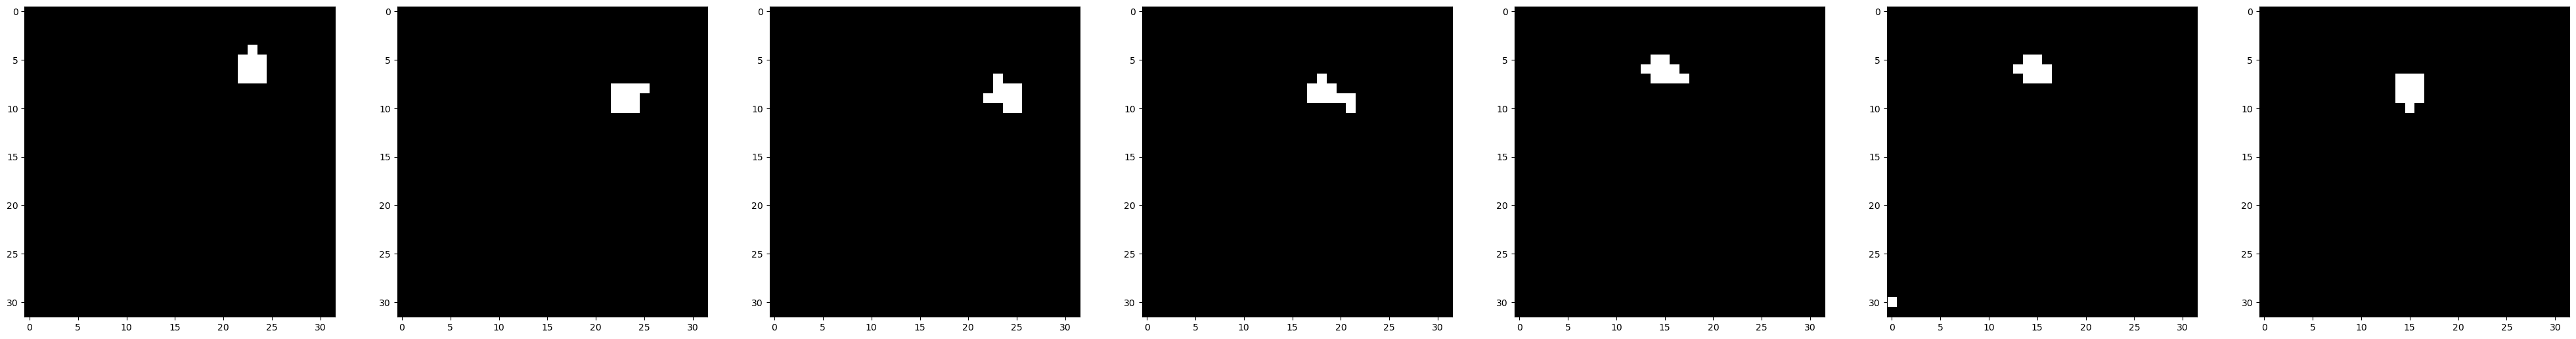

In [137]:
plt.figure(figsize=(50, 50))  # Adjust the figure size as needed
n=7
for i in range(1,n+1):

    img = Image.open(f'frames/Substack (1-314)0000000{i}.png'.format(i))
    img = np.array(img)
    img = img[0:32,0:32]
    img = make_bin(img,.99)
    img = (img / 65535 * 255).astype(np.uint8)
    plt.subplot(1, n, i)
    plt.imshow(img)